<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/05.%20week%205/Task/ML_Week_5_NetflixTitles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from IPython.display import display, Markdown

In [19]:
url = "https://raw.githubusercontent.com/KrituneX/Machine-Learning/refs/heads/main/05.%20week%205/dataset/netflix_titles.csv"
df = pd.read_csv(url)

In [20]:
print("First 5 Rows:")
print(df.head())

print("\nData Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

First 5 Rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24

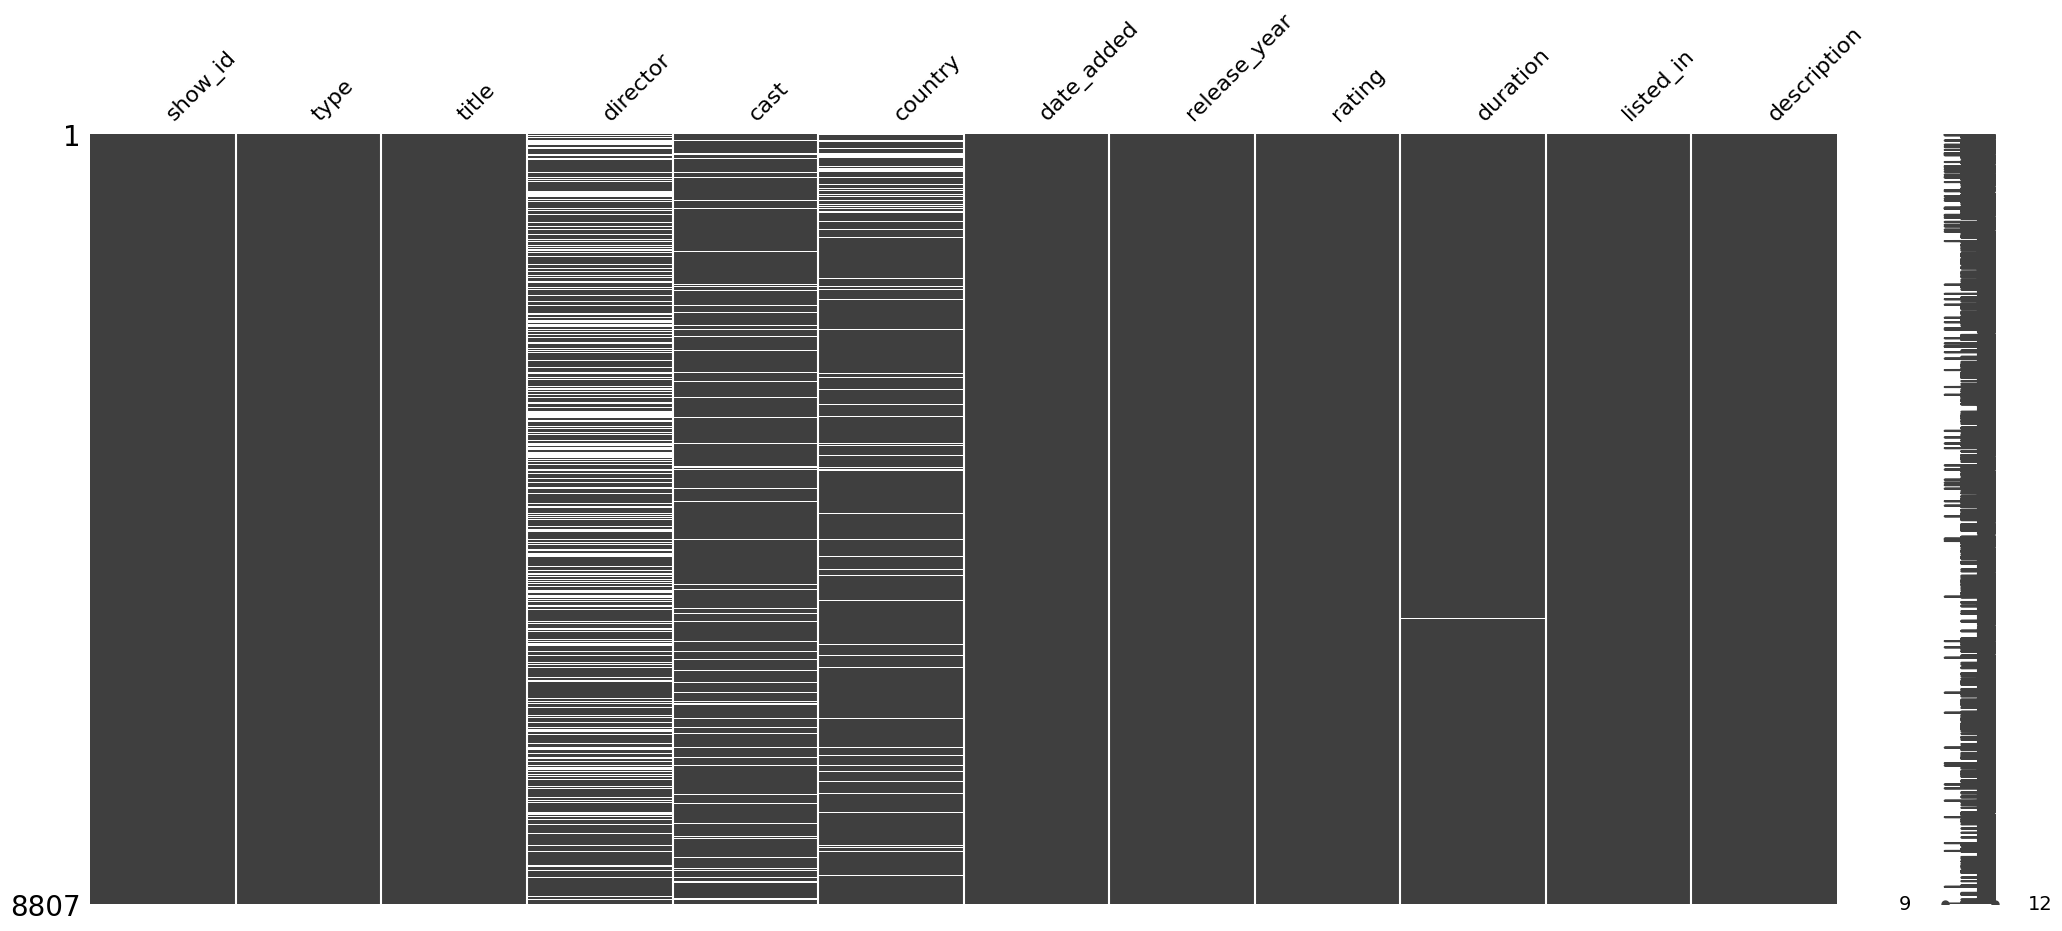

In [21]:
msno.matrix(df)
plt.show()

In [25]:
df['date_added'].fillna(method='ffill', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce') # Strip leading/trailing whitespaces and handle errors
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['rating'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)

<ipython-input-25-2139a924f542>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_added'].fillna(method='ffill', inplace=True)
<ipython-input-25-2139a924f542>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Unknown', inplace=True)
<ipython-input-25-2139a924f542>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will

<ipython-input-26-641aeb669f33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


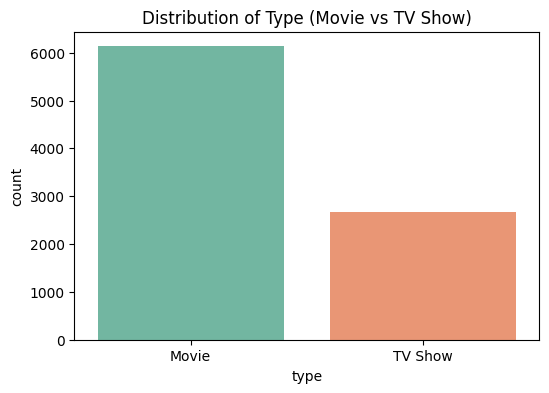

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Type (Movie vs TV Show)')
plt.show()

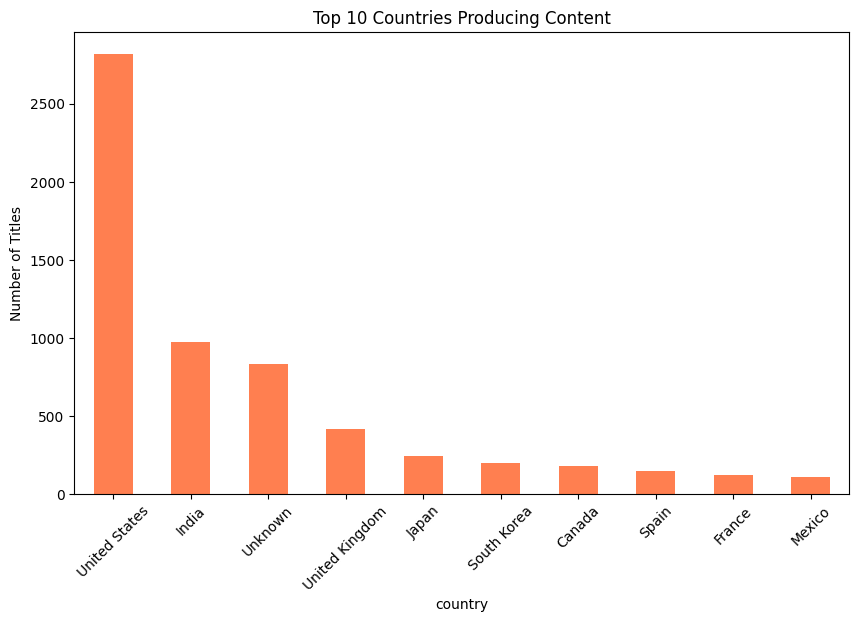

In [27]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Countries Producing Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

<ipython-input-28-0fa770102536>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='mako')


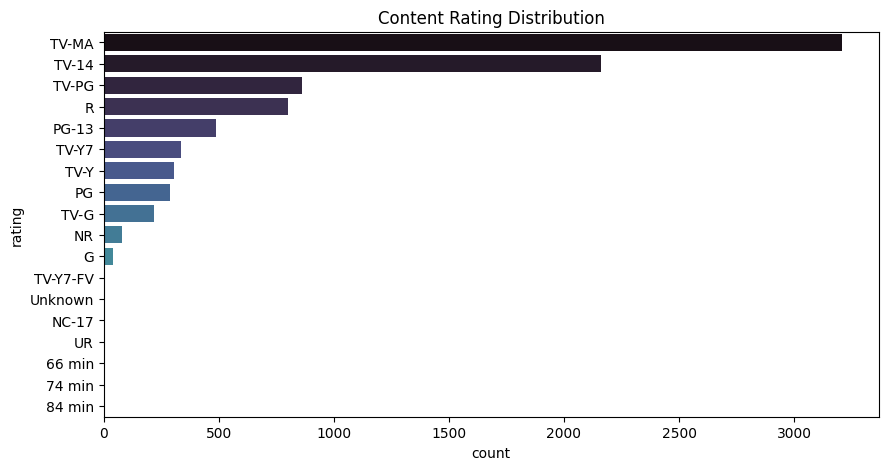

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='mako')
plt.title('Content Rating Distribution')
plt.show()

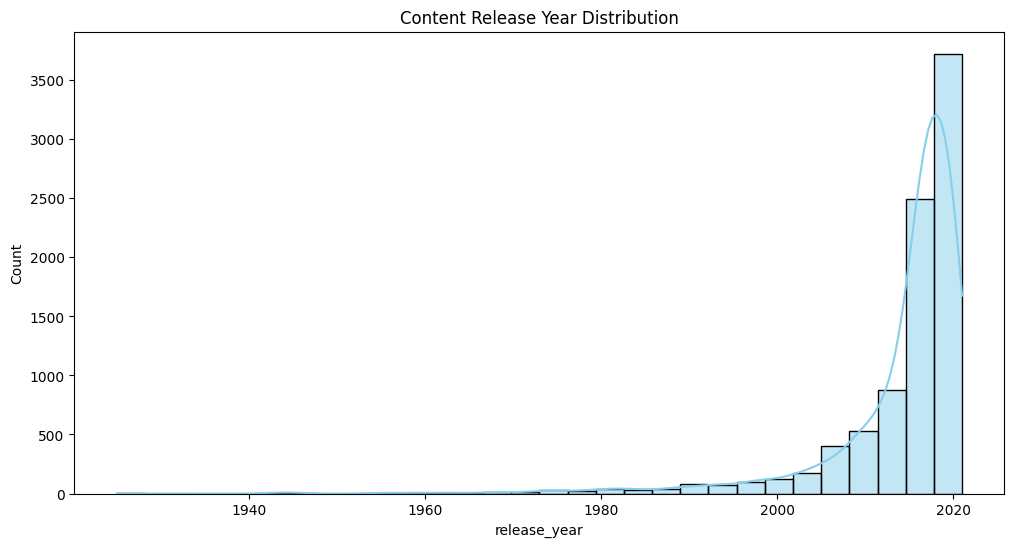

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Content Release Year Distribution')
plt.show()

<ipython-input-30-00b443aa5ed4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='husl')


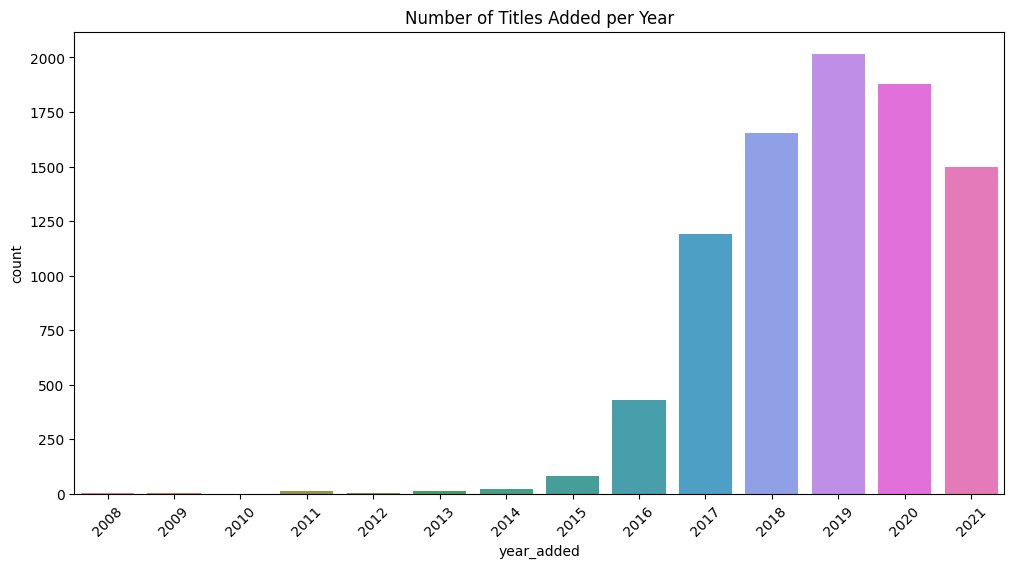

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', palette='husl')
plt.title('Number of Titles Added per Year')
plt.xticks(rotation=45)
plt.show()

<ipython-input-31-80d409d59551>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)


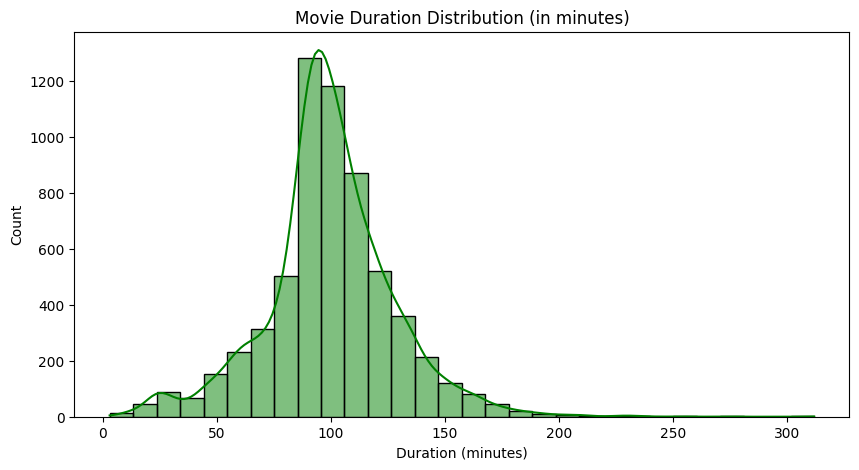

In [31]:
df_movies = df[df['type'] == 'Movie']
df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(df_movies['duration_int'], bins=30, kde=True, color='green')
plt.title('Movie Duration Distribution (in minutes)')
plt.xlabel('Duration (minutes)')
plt.show()

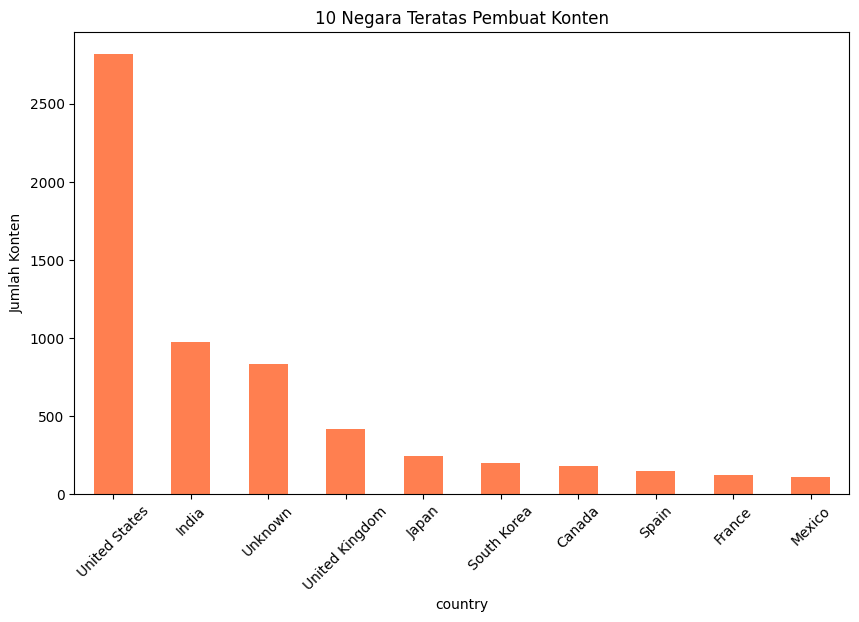

In [32]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('10 Negara Teratas Pembuat Konten')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.show()

In [35]:
display(Markdown(r"**Mean (Rata-rata)**"))
display(Markdown(r"$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$"))

**Mean (Rata-rata)**

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

In [36]:
display(Markdown(r"**Median**"))
display(Markdown(r"$$\text{Median} = \begin{cases} x_{\frac{n+1}{2}}, & \text{jika } n \text{ ganjil} \\ \frac{1}{2}(x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}), & \text{jika } n \text{ genap} \end{cases}$$"))

**Median**

$$\text{Median} = \begin{cases} x_{\frac{n+1}{2}}, & \text{jika } n \text{ ganjil} \\ \frac{1}{2}(x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}), & \text{jika } n \text{ genap} \end{cases}$$

In [37]:
display(Markdown(r"**Standard Deviation (Simpangan Baku)**"))
display(Markdown(r"$$\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 }$$"))

**Standard Deviation (Simpangan Baku)**

$$\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 }$$

In [38]:
display(Markdown(r"**Variance (Varians)**"))
display(Markdown(r"$$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$"))

**Variance (Varians)**

$$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

In [39]:
display(Markdown(r"**Skewness (Kemencengan)**"))
display(Markdown(r"$$\text{Skewness} = \frac{n}{(n-1)(n-2)} \sum \left( \frac{x_i - \bar{x}}{s} \right)^3$$"))

**Skewness (Kemencengan)**

$$\text{Skewness} = \frac{n}{(n-1)(n-2)} \sum \left( \frac{x_i - \bar{x}}{s} \right)^3$$

In [40]:
display(Markdown(r"**Kurtosis**"))
display(Markdown(r"$$\text{Kurtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum \left( \frac{x_i - \bar{x}}{s} \right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}$$"))

**Kurtosis**

$$\text{Kurtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum \left( \frac{x_i - \bar{x}}{s} \right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}$$

In [41]:
display(Markdown(r"**Accuracy**"))
display(Markdown(r"$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$"))

**Accuracy**

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$